# Exploratory Data Analysis

In [1]:
import numpy as np
import pandas as pd

# 1.1 Missing Values

### Handling Missing Values

In [3]:
s = pd.Series(["red", "green", "blue", np.nan])
s


0      red
1    green
2     blue
3      NaN
dtype: object

In [4]:
s.isnull()

0    False
1    False
2    False
3     True
dtype: bool

In [5]:
s[0] = None

In [7]:
s.isnull()

0     True
1    False
2    False
3     True
dtype: bool

In [9]:
any(s.isnull())

True

### Filtering the Null Values

In [15]:
from numpy import nan as NA

In [10]:
data = pd.Series([1, np.nan, 3.5, np.nan, 4,5])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    4.0
5    5.0
dtype: float64

In [11]:
data.dropna()

0    1.0
2    3.5
4    4.0
5    5.0
dtype: float64

In [16]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA],
                     [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [17]:
data.dropna()

,0,1,2
0,1.0,6.5,3.0


In [18]:
data.dropna(thresh=2)

,0,1,2
0,1.0,6.5,3.0
3,NaN,6.5,3.0


In [19]:
data


,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [20]:
data.dropna(axis=1)

""
0
1
2
3


In [21]:
data[3] = NA
data

,0,1,2,3
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [22]:
data.dropna(how='all', axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [27]:
df = pd.DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,1.073060,-1.649756,-0.631419
1,1.191708,-0.127800,-0.803712
2,-2.260400,-0.507237,1.683516
3,1.191655,0.332978,-0.421468
4,-1.122800,0.608033,-2.186586
5,-0.326235,0.546958,1.458413
6,-0.167648,0.593038,-0.288444


In [28]:
df.iloc[:4, 1] = NA
df.iloc[:2, 2] = NA
df

,0,1,2
0,1.073060,NaN,NaN
1,1.191708,NaN,NaN
2,-2.260400,NaN,1.683516
3,1.191655,NaN,-0.421468
4,-1.122800,0.608033,-2.186586
5,-0.326235,0.546958,1.458413
6,-0.167648,0.593038,-0.288444


In [33]:
df1=df.dropna(thresh=4, axis=1) # Richard
df1

,0,2
0,1.073060,NaN
1,1.191708,NaN
2,-2.260400,1.683516
3,1.191655,-0.421468
4,-1.122800,-2.186586
5,-0.326235,1.458413
6,-0.167648,-0.288444


In [30]:
df1 = df.drop(1,axis=1) # Tilak
df1

,0,2
0,1.073060,NaN
1,1.191708,NaN
2,-2.260400,1.683516
3,1.191655,-0.421468
4,-1.122800,-2.186586
5,-0.326235,1.458413
6,-0.167648,-0.288444


In [47]:
df2 = df.dropna(thresh=2, axis=1) # Tilak: dropping column 2
df2

,0,1,2,3
0,1.073060,NaN,NaN,NaN
1,1.191708,NaN,NaN,NaN
2,-2.260400,NaN,1.683516,NaN
3,1.191655,NaN,-0.421468,NaN
4,-1.122800,0.608033,-2.186586,0.608033
5,-0.326235,0.546958,1.458413,0.546958
6,-0.167648,0.593038,-0.288444,0.593038


In [42]:
df[3] = df[1]

In [44]:
df2 = df.dropna(thresh=4, axis=1)  # Tilak: Does it drop multiple columns
df2

,0,2
0,1.073060,NaN
1,1.191708,NaN
2,-2.260400,1.683516
3,1.191655,-0.421468
4,-1.122800,-2.186586
5,-0.326235,1.458413
6,-0.167648,-0.288444


In [48]:
df

,0,1,2,3
0,1.073060,NaN,NaN,NaN
1,1.191708,NaN,NaN,NaN
2,-2.260400,NaN,1.683516,NaN
3,1.191655,NaN,-0.421468,NaN
4,-1.122800,0.608033,-2.186586,0.608033
5,-0.326235,0.546958,1.458413,0.546958
6,-0.167648,0.593038,-0.288444,0.593038


In [49]:
df2 = df.dropna(thresh=6, axis=1)  # Jasmita
df2

,0
0,1.073060
1,1.191708
2,-2.260400
3,1.191655
4,-1.122800
5,-0.326235
6,-0.167648


### Filling Missing Data: Imputation

In [50]:
df

,0,1,2,3
0,1.073060,NaN,NaN,NaN
1,1.191708,NaN,NaN,NaN
2,-2.260400,NaN,1.683516,NaN
3,1.191655,NaN,-0.421468,NaN
4,-1.122800,0.608033,-2.186586,0.608033
5,-0.326235,0.546958,1.458413,0.546958
6,-0.167648,0.593038,-0.288444,0.593038


In [51]:
df.fillna(0)

,0,1,2,3
0,1.073060,0.000000,0.000000,0.000000
1,1.191708,0.000000,0.000000,0.000000
2,-2.260400,0.000000,1.683516,0.000000
3,1.191655,0.000000,-0.421468,0.000000
4,-1.122800,0.608033,-2.186586,0.608033
5,-0.326235,0.546958,1.458413,0.546958
6,-0.167648,0.593038,-0.288444,0.593038


In [53]:
df1 = df.fillna({1:0.5, 2:0.75, 3:1.0})
df1

,0,1,2,3
0,1.073060,0.500000,0.750000,1.000000
1,1.191708,0.500000,0.750000,1.000000
2,-2.260400,0.500000,1.683516,1.000000
3,1.191655,0.500000,-0.421468,1.000000
4,-1.122800,0.608033,-2.186586,0.608033
5,-0.326235,0.546958,1.458413,0.546958
6,-0.167648,0.593038,-0.288444,0.593038


In [54]:
df = pd.DataFrame(np.random.randn(6, 3))
df.iloc[2:, 1] = NA
df.iloc[4:, 2] = NA
df

,0,1,2
0,-1.544712,0.663461,0.772768
1,0.436894,0.103247,-0.666371
2,1.975059,NaN,0.331052
3,-0.818318,NaN,0.806913
4,-1.683104,NaN,NaN
5,1.020817,NaN,NaN


In [55]:
df.fillna(method='ffill')

,0,1,2
0,-1.544712,0.663461,0.772768
1,0.436894,0.103247,-0.666371
2,1.975059,0.103247,0.331052
3,-0.818318,0.103247,0.806913
4,-1.683104,0.103247,0.806913
5,1.020817,0.103247,0.806913


In [56]:
df.fillna(method='ffill', limit=2)

,0,1,2
0,-1.544712,0.663461,0.772768
1,0.436894,0.103247,-0.666371
2,1.975059,0.103247,0.331052
3,-0.818318,0.103247,0.806913
4,-1.683104,NaN,0.806913
5,1.020817,NaN,0.806913


In [58]:
df

,0,1,2
0,-1.544712,0.663461,0.772768
1,0.436894,0.103247,-0.666371
2,1.975059,NaN,0.331052
3,-0.818318,NaN,0.806913
4,-1.683104,NaN,NaN
5,1.020817,NaN,NaN


In [60]:
df[1] = df[1].fillna(df[1].mean())

In [61]:
df

,0,1,2
0,-1.544712,0.663461,0.772768
1,0.436894,0.103247,-0.666371
2,1.975059,0.383354,0.331052
3,-0.818318,0.383354,0.806913
4,-1.683104,0.383354,NaN
5,1.020817,0.383354,NaN


# 1.2 Data Transformation

### Removing Duplicates

In [63]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'],
                     'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


In [64]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

In [65]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


In [70]:
data['k3'] = range(7)
data.drop_duplicates()

,k1,k2,k3
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [71]:
data.drop_duplicates(['k1'])

,k1,k2,k3
0,one,1,0
1,two,1,1


In [72]:
data.drop_duplicates(['k1', 'k2'])

,k1,k2,k3
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5


In [75]:
data.drop_duplicates(['k1', 'k2'], keep='last')

,k1,k2,k3
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
6,two,4,6


### Function Mapping

In [76]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
                              'Pastrami', 'corned beef', 'Bacon',
                              'pastrami', 'honey ham', 'nova lox'],
                     'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


In [77]:
data['animal'] = NA

In [78]:
data

,food,ounces,animal
0,bacon,4.0,NaN
1,pulled pork,3.0,NaN
2,bacon,12.0,NaN
3,Pastrami,6.0,NaN
4,corned beef,7.5,NaN
5,Bacon,8.0,NaN
6,pastrami,3.0,NaN
7,honey ham,5.0,NaN
8,nova lox,6.0,NaN


In [79]:
meat_to_animal = {
  'bacon': 'pig',
  'pulled pork': 'pig',
  'pastrami': 'cow',
  'corned beef': 'cow',
  'honey ham': 'pig',
  'nova lox': 'salmon'
}

In [80]:
T = [100, 105, 107, 109, 110]
F = []
for t in T:
    F.append(t * 1.8 + 32)
F

[212.0, 221.0, 224.6, 228.20000000000002, 230.0]

In [82]:
F1 = map(lambda t : t * 1.8 + 32, T)
list(F1)

[212.0, 221.0, 224.6, 228.20000000000002, 230.0]

In [83]:
lowercased = data['food'].str.lower()
data['animal'] = lowercased.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


### Replacing Values

In [84]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

In [88]:
data = data.replace(-999.0, 1.0)
data

0       1.0
1       1.0
2       2.0
3       1.0
4   -1000.0
5       3.0
dtype: float64

In [94]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data = data.replace([-999.0, -1000.0], [1000, 2000])
data

0       1.0
1    1000.0
2       2.0
3    1000.0
4    2000.0
5       3.0
dtype: float64

In [95]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data = data.replace({-999.0:NA, -1000: 1000})
data

0       1.0
1       NaN
2       2.0
3       NaN
4    1000.0
5       3.0
dtype: float64

### Renaming Axis

In [96]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
                    index=['Ohio', 'Colorado', 'New York'],
                    columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [97]:
data.index

Index(['Ohio', 'Colorado', 'New York'], dtype='object')

In [100]:
data.index.map(lambda i : i[:3].upper())

Index(['OHI', 'COL', 'NEW'], dtype='object')

In [101]:
data.index = data.index.map(lambda i : i[:3].upper())

In [102]:
data

,one,two,three,four
OHI,0,1,2,3
COL,4,5,6,7
NEW,8,9,10,11


In [103]:
data.rename(index=str.lower, columns=str.upper)

,ONE,TWO,THREE,FOUR
ohi,0,1,2,3
col,4,5,6,7
new,8,9,10,11


In [104]:
data.rename(index={'OHI':'TEXAS'}, columns={'one':'FIRST'})

,FIRST,two,three,four
TEXAS,0,1,2,3
COL,4,5,6,7
NEW,8,9,10,11


### Discreetization and Binning

In [105]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

In [106]:
bins = [18, 25, 35, 60, 100]
cats = pd.cut(ages, bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [107]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [108]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [109]:
pd.value_counts(cats)

(18, 25]     5
(35, 60]     3
(25, 35]     3
(60, 100]    1
dtype: int64

In [110]:
cats.value_counts()

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

In [111]:
import matplotlib.pyplot as plt


<BarContainer object of 4 artists>

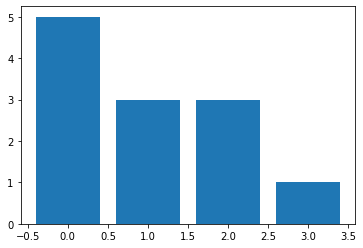

In [112]:
plt.bar(range(4),cats.value_counts() )

In [118]:
N = 5
data = np.random.rand(20)
c = pd.cut(data, N)
c

[(0.43, 0.606], (0.254, 0.43], (0.43, 0.606], (0.43, 0.606], (0.0775, 0.254], ..., (0.254, 0.43], (0.254, 0.43], (0.606, 0.781], (0.606, 0.781], (0.606, 0.781]]
Length: 20
Categories (5, interval[float64]): [(0.0775, 0.254] < (0.254, 0.43] < (0.43, 0.606] < (0.606, 0.781] < (0.781, 0.957]]

In [119]:
min(data)

0.07838295998409439

In [120]:
max(data)

0.9569880397255994

In [121]:
c.value_counts()

(0.0775, 0.254]    4
(0.254, 0.43]      3
(0.43, 0.606]      5
(0.606, 0.781]     6
(0.781, 0.957]     2
dtype: int64

In [122]:
data = np.random.rand(1000) 
c = pd.qcut(data, 4)
c

[(0.507, 0.745], (0.00082, 0.262], (0.262, 0.507], (0.745, 0.999], (0.262, 0.507], ..., (0.507, 0.745], (0.262, 0.507], (0.262, 0.507], (0.00082, 0.262], (0.507, 0.745]]
Length: 1000
Categories (4, interval[float64]): [(0.00082, 0.262] < (0.262, 0.507] < (0.507, 0.745] < (0.745, 0.999]]

In [123]:
c.value_counts()

(0.00082, 0.262]    250
(0.262, 0.507]      250
(0.507, 0.745]      250
(0.745, 0.999]      250
dtype: int64

In [125]:
c = pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.0])

In [126]:
c.value_counts()

(0.00082, 0.106]    100
(0.106, 0.507]      400
(0.507, 0.906]      400
(0.906, 0.999]      100
dtype: int64

##### Exercise: 15 Minutes

In [127]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]] 
                                                                                                  
['Young', .... 'Young Adult', 'Middle Aged', 'Senior']

c.value_counts()

'Young' -> 5


'Senior' -> 6

In [128]:
# Pratixit, Sai Teja, Shivani, Yashwanth, Pravin, Srivastava, Jasmita

df=pd.DataFrame({'Age':ages})
df['Category']=pd.cut(df.Age,[18,25,35,60,65],labels=['Young','Middle-Aged','Senior','Old'])
print(df)
print(df['Category'].value_counts())


    Age     Category
0    20        Young
1    22        Young
2    25        Young
3    27  Middle-Aged
4    21        Young
5    23        Young
6    37       Senior
7    31  Middle-Aged
8    61          Old
9    45       Senior
10   41       Senior
11   32  Middle-Aged
Young          5
Senior         3
Middle-Aged    3
Old            1
Name: Category, dtype: int64


### Outlier Analysis

In [154]:
data = pd.DataFrame(np.random.randn(1000, 4))
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.033755,0.000843,-0.038181,-0.000761
std,1.024282,1.005668,0.962281,1.004297
min,-3.930725,-3.280625,-3.062255,-3.220720
25%,-0.687069,-0.659906,-0.684904,-0.719806
50%,0.047128,0.001272,-0.041190,-0.014593
75%,0.727990,0.656218,0.627079,0.666277
max,3.156890,3.084262,2.650343,3.206688


In [130]:
data.shape

(1000, 4)

In [131]:
out = 3 # outlier threshold =? -3 and +3

In [134]:
col = data[2]
col[col > 3]

85     3.149616
106    3.015543
439    3.308028
639    3.068509
Name: 2, dtype: float64

In [135]:
col[np.abs(col) > 3]

75    -3.001746
85     3.149616
106    3.015543
130   -3.117412
212   -3.177877
439    3.308028
639    3.068509
Name: 2, dtype: float64

In [150]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
33,0.038496,-1.293623,-3.140198,0.302213
150,-0.925565,0.099781,-3.228781,-0.866624
420,-3.147642,-1.362677,-0.656429,-0.321747
529,-0.040770,-3.102567,-0.901238,-0.145573
583,-0.323439,1.270694,3.327072,-2.845640
591,-0.749040,0.066043,-3.144231,0.463768
604,-0.839336,3.088768,0.079195,2.121755
686,3.617277,0.464611,-0.330209,0.250031
785,3.122959,-0.369060,-0.886151,0.129722
947,-0.930021,-3.353261,0.014779,-0.088291


In [139]:
data[(np.abs(data) > 3).any(1)].index

Int64Index([ 75,  85, 106, 130, 212, 300, 345, 439, 471, 501, 580, 639, 669,
            757, 849, 955, 980],
           dtype='int64')

In [140]:
# To drop the rows having outliers
data.drop(data[(np.abs(data) > 3).any(1)].index) 

,0,1,2,3
0,0.056697,0.159532,0.994185,0.186506
1,1.529498,1.140260,2.456183,-0.587571
2,-0.859887,0.877863,-0.121609,-1.301348
3,-0.249724,0.062345,0.592858,-0.248364
4,0.545833,0.740580,-0.186505,-0.995821
...,...,...,...,...
995,-0.409953,-0.935666,0.153231,0.511338
996,0.708838,2.035675,-0.965698,1.661455
997,0.468997,-0.553638,1.170225,-1.647458
998,2.033195,-0.343499,0.095830,-1.158378


##### Exercise: Replace the outliers with a value less than the outlier threshold

In [206]:
data = pd.DataFrame(np.random.randn(1000, 4))
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
8,0.618429,-0.303936,1.458352,3.268068
322,-0.622147,3.179971,-0.052595,0.681525
324,0.729617,-3.064090,2.420457,-1.164836
345,3.458435,-0.460176,-0.463400,0.496744
401,0.560135,0.028683,-0.121503,3.574650
456,-0.543371,0.128851,0.487690,-3.568404
516,-1.222017,3.408204,-1.208366,0.537032
523,3.053943,-1.148765,-0.519903,-1.568348
562,3.224296,1.490487,0.145504,1.071626
709,-3.065141,1.144475,-0.149628,0.399687


In [207]:
rows = data[(np.abs(data) > 3).any(1)].index
rows

Int64Index([8, 322, 324, 345, 401, 456, 516, 523, 562, 709, 760, 970], dtype='int64')

In [196]:
# Kavya

data[(np.abs(data) > 3).any(1)] = out - 1

In [208]:
# Kavya's solution modified

data[(np.abs(data) > 3)] = np.sign(data)*(out - 1)

In [201]:
# Kavya's previous solution results

data.loc[rows]

,0,1,2,3
74,-0.404872,0.017037,2.000000,-1.427199
144,-0.033318,1.828914,0.650530,2.000000
151,0.324687,-1.533937,-0.061988,2.000000
372,0.221406,0.150254,2.000000,-0.867647
394,0.658474,0.503373,2.000000,0.437477
482,0.469251,2.000000,-0.094441,0.278766
567,0.194041,1.577976,-1.035123,2.000000
806,-2.128842,2.000000,-0.680307,2.330276
913,2.000000,-1.134614,-1.160893,-0.840455
930,-0.406841,-0.444884,0.227704,2.000000


In [209]:
# Kavya's modified solution results

data.loc[rows]

,0,1,2,3
8,0.618429,-0.303936,1.458352,2.000000
322,-0.622147,2.000000,-0.052595,0.681525
324,0.729617,-2.000000,2.420457,-1.164836
345,2.000000,-0.460176,-0.463400,0.496744
401,0.560135,0.028683,-0.121503,2.000000
456,-0.543371,0.128851,0.487690,-2.000000
516,-1.222017,2.000000,-1.208366,0.537032
523,2.000000,-1.148765,-0.519903,-1.568348
562,2.000000,1.490487,0.145504,1.071626
709,-2.000000,1.144475,-0.149628,0.399687


In [192]:
# Sai Teja

data1 = pd.DataFrame(np.where(np.abs(data)>3, np.sign(data) * (out - 1),data), data.index,data.columns)


In [193]:
data1.loc[rows]

,0,1,2,3
13,-0.413423,-1.170834,1.268668,-2.000000
271,1.875305,1.079898,2.000000,0.220450
328,2.000000,0.024177,-0.194913,-1.337622
464,-0.037534,-0.341923,-1.142153,2.000000
472,0.088009,1.487967,1.497800,-2.000000
625,-0.204117,-0.664122,-2.000000,-0.165654
652,-2.000000,-0.033374,-1.630666,-0.630893
678,0.738977,-1.073244,-1.716867,2.000000
690,-0.061952,2.000000,-1.001618,2.461926
745,2.000000,-0.061388,-0.908661,-0.097927


##### Use np.sign(data) to preserve the sign

##### Exercise: 15 minutes

In [247]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [248]:
data[1].loc[5] = 89
data[3].loc[59] = -76

In [241]:
data.loc[5]

0     0.306215
1    89.000000
2    -0.832069
3     1.943600
Name: 5, dtype: float64

In [242]:
data.loc[59]

0     1.168806
1     0.890254
2    -1.182910
3   -76.000000
Name: 59, dtype: float64

In [233]:
# Solution -> Jasmita

# IQR
# thresh = 1.5 * IQR
# replace the outliers with the thrid quartile of the data


# ----------------------------------------------------------


  
# First quartile (Q1)
Q1 = np.percentile(data, 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data, 75, interpolation = 'midpoint')
  
# Interquaritle range (IQR)
IQR = Q3 - Q1

# Thresh
thresh=1.5*IQR


data1 = pd.DataFrame(np.where(np.abs(data)>thresh, np.sign(data)*(Q3),data), data.index,data.columns)

data1


,0,1,2,3
0,0.818004,-0.577434,0.197163,0.542621
1,0.161645,0.135288,-1.013760,0.034718
2,-0.828684,1.106713,0.874608,-0.288332
3,1.357377,-0.995059,0.720143,-0.301884
4,-1.508628,1.226910,-1.138010,-0.241731
...,...,...,...,...
995,0.704218,0.132185,-0.714586,-2.018520
996,0.591423,2.063086,0.191638,1.298079
997,0.140186,-1.445877,-0.417015,-0.260656
998,-0.704218,0.589938,-2.058216,0.201265


In [236]:
data1.loc[5]

0    0.389120
1    0.704218
2    0.074622
3   -0.336353
Name: 5, dtype: float64

In [237]:
data1.loc[59]

0    0.092743
1   -0.319406
2    0.206544
3   -0.704218
Name: 59, dtype: float64

In [238]:
# Lakshmi

q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1
thresh = 1.5*iqr
data = pd.DataFrame(np.where(np.abs(data)>thresh, q3,data), data.index,data.columns)


In [243]:
# Shivani

def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1
    thres= 1.5* IQR
    data[(np.abs(data) > thres)] = np.sign(data)*Q3

for i in data.columns:
        removeOutliers(data, i)


In [244]:
data1.loc[5]

0    0.389120
1    0.704218
2    0.074622
3   -0.336353
Name: 5, dtype: float64

In [245]:
data1.loc[59]

0    0.092743
1   -0.319406
2    0.206544
3   -0.704218
Name: 59, dtype: float64

In [246]:
# Kavya

for i in range(data.shape[1]):
    Q3 = np.quantile(data[i], 0.75)
    Q1 = np.quantile(data[i], 0.25)
    data[(np.abs(data[i]) > 1.5*Q3)] = np.sign(data) * Q3


In [254]:
# Yashwanth

Q1 = np.percentile(data,25,interpolation='midpoint')
print('Q1: ',Q1)
Q3 = np.percentile(data,75,interpolation='midpoint')
print("Q3: ",Q3)

IQR = Q3-Q1
print("IQR: ",IQR)


thresh = 1.5 * IQR

data[(np.abs(data)>thresh).any(1)]

data1 = pd.DataFrame(np.where(np.abs(data)>thresh, np.sign(data)*(out -1),data), data.index,data.columns)
data1

data1.loc[5]




Q1:  -0.6855504981808614
Q3:  0.6743018104277279
IQR:  1.3598523086085894


0   -0.438460
1    2.000000
2   -0.771848
3   -0.324670
Name: 5, dtype: float64

In [255]:
data1

,0,1,2,3
0,0.288580,-0.663058,-2.009539,-0.959169
1,1.101852,1.871777,-0.531208,-1.271535
2,-0.005941,1.430470,-0.122720,0.075778
3,-1.142415,-1.080095,-0.141146,-0.152241
4,0.227675,-0.630630,-1.577107,0.973601
...,...,...,...,...
995,0.930273,0.466841,-0.779124,0.424549
996,-2.000000,0.664653,-0.092934,-0.707479
997,-2.000000,-0.258664,0.473378,-1.280571
998,0.017012,0.170486,0.168438,0.420288


### Permutations and Random Sampling

In [256]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


In [258]:
sampler = np.random.permutation(5)
sampler

array([1, 4, 2, 3, 0])

In [259]:
df.iloc[sampler]

,0,1,2,3
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11
3,12,13,14,15
0,0,1,2,3


In [260]:
df.take(sampler)

,0,1,2,3
1,4,5,6,7
4,16,17,18,19
2,8,9,10,11
3,12,13,14,15
0,0,1,2,3


In [261]:
df.sample(3)

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
3,12,13,14,15


In [262]:
df.sample(3)

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11


### Computing the Dummy Variable (Indicator Matrix)

In [263]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
                   'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [264]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [265]:
pd.get_dummies(df['key'], prefix='key')

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [266]:
df_with_dummy = df[['data1']].join(pd.get_dummies(df['key'], prefix='key'))

In [267]:
df_with_dummy


,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


##### Real Example

In [269]:
movies = pd.read_csv(r'C:\Users\Purushotham\Desktop\deloitte\2022\05 eda\datasets\movies.csv')

In [270]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [274]:
# Get all the genres
all_genres = []
len(movies['genres'])

9742

In [276]:
l = movies['genres'].to_list()
l

['Adventure|Animation|Children|Comedy|Fantasy',
 'Adventure|Children|Fantasy',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Comedy',
 'Action|Crime|Thriller',
 'Comedy|Romance',
 'Adventure|Children',
 'Action',
 'Action|Adventure|Thriller',
 'Comedy|Drama|Romance',
 'Comedy|Horror',
 'Adventure|Animation|Children',
 'Drama',
 'Action|Adventure|Romance',
 'Crime|Drama',
 'Drama|Romance',
 'Comedy',
 'Comedy',
 'Action|Comedy|Crime|Drama|Thriller',
 'Comedy|Crime|Thriller',
 'Crime|Drama|Horror|Mystery|Thriller',
 'Action|Crime|Thriller',
 'Drama|Sci-Fi',
 'Drama|Romance',
 'Drama',
 'Children|Drama',
 'Drama|Romance',
 'Adventure|Drama|Fantasy|Mystery|Sci-Fi',
 'Crime|Drama',
 'Drama',
 'Mystery|Sci-Fi|Thriller',
 'Children|Drama',
 'Crime|Drama',
 'Children|Comedy',
 'Comedy|Romance',
 'Drama',
 'Drama|War',
 'Action|Crime|Drama',
 'Drama',
 'Action|Adventure|Fantasy',
 'Comedy|Drama|Thriller',
 'Drama|Romance',
 'Mystery|Thriller',
 'Animation|Children|Drama|Musical|Romance',
 'Dram

In [278]:
l[0].split('|')

['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy']

In [279]:
for genre in movies['genres'].to_list():
    all_genres.extend(genre.split('|'))
all_genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Adventure',
 'Children',
 'Fantasy',
 'Comedy',
 'Romance',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Action',
 'Crime',
 'Thriller',
 'Comedy',
 'Romance',
 'Adventure',
 'Children',
 'Action',
 'Action',
 'Adventure',
 'Thriller',
 'Comedy',
 'Drama',
 'Romance',
 'Comedy',
 'Horror',
 'Adventure',
 'Animation',
 'Children',
 'Drama',
 'Action',
 'Adventure',
 'Romance',
 'Crime',
 'Drama',
 'Drama',
 'Romance',
 'Comedy',
 'Comedy',
 'Action',
 'Comedy',
 'Crime',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Thriller',
 'Crime',
 'Drama',
 'Horror',
 'Mystery',
 'Thriller',
 'Action',
 'Crime',
 'Thriller',
 'Drama',
 'Sci-Fi',
 'Drama',
 'Romance',
 'Drama',
 'Children',
 'Drama',
 'Drama',
 'Romance',
 'Adventure',
 'Drama',
 'Fantasy',
 'Mystery',
 'Sci-Fi',
 'Crime',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Thriller',
 'Children',
 'Drama',
 'Crime',
 'Drama',
 'Children',
 'Comedy',
 'Comedy',
 'Romance'

In [280]:
set(all_genres)

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [286]:
all_generes = pd.unique(all_genres)
all_genres = all_generes[:-1]
all_genres

array(['Adventure', 'Animation', 'Children', 'Comedy', 'Fantasy',
       'Romance', 'Drama', 'Action', 'Crime', 'Thriller', 'Horror',
       'Mystery', 'Sci-Fi', 'War', 'Musical', 'Documentary', 'IMAX',
       'Western'], dtype=object)

In [288]:
# adding the indicators to the data frame

zero_matrix = np.zeros((len(movies), len(all_genres)))
zero_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [290]:
dummies = pd.DataFrame(zero_matrix, columns=all_genres)
dummies.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [291]:
dummies.iloc[0, 0] = 1

In [303]:
dummies.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [299]:
gen = movies['genres'][0]
mask = dummies.columns.get_indexer(['Crime', 'Mystery'])

In [302]:
dummies.iloc[0, mask] = 1

In [305]:
# full fledges logic for above functionality
list(enumerate(movies['genres']))

[(0, 'Adventure|Animation|Children|Comedy|Fantasy'),
 (1, 'Adventure|Children|Fantasy'),
 (2, 'Comedy|Romance'),
 (3, 'Comedy|Drama|Romance'),
 (4, 'Comedy'),
 (5, 'Action|Crime|Thriller'),
 (6, 'Comedy|Romance'),
 (7, 'Adventure|Children'),
 (8, 'Action'),
 (9, 'Action|Adventure|Thriller'),
 (10, 'Comedy|Drama|Romance'),
 (11, 'Comedy|Horror'),
 (12, 'Adventure|Animation|Children'),
 (13, 'Drama'),
 (14, 'Action|Adventure|Romance'),
 (15, 'Crime|Drama'),
 (16, 'Drama|Romance'),
 (17, 'Comedy'),
 (18, 'Comedy'),
 (19, 'Action|Comedy|Crime|Drama|Thriller'),
 (20, 'Comedy|Crime|Thriller'),
 (21, 'Crime|Drama|Horror|Mystery|Thriller'),
 (22, 'Action|Crime|Thriller'),
 (23, 'Drama|Sci-Fi'),
 (24, 'Drama|Romance'),
 (25, 'Drama'),
 (26, 'Children|Drama'),
 (27, 'Drama|Romance'),
 (28, 'Adventure|Drama|Fantasy|Mystery|Sci-Fi'),
 (29, 'Crime|Drama'),
 (30, 'Drama'),
 (31, 'Mystery|Sci-Fi|Thriller'),
 (32, 'Children|Drama'),
 (33, 'Crime|Drama'),
 (34, 'Children|Comedy'),
 (35, 'Comedy|Romance

In [306]:
for i, gen in enumerate(movies['genres']):
    mask = dummies.columns.get_indexer(gen.split('|'))
    dummies.iloc[i, mask] = 1

In [307]:
dummies.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western
0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [308]:
# Combine it with movies
movies2 = movies.join(dummies.add_prefix('Genre'))


movies2.iloc[4]

In [218]:
max(data[1])

89.0

In [310]:
movies2.iloc[10]

movieId                                         11
title               American President, The (1995)
genres                        Comedy|Drama|Romance
GenreAdventure                                   0
GenreAnimation                                   0
GenreChildren                                    0
GenreComedy                                      1
GenreFantasy                                     0
GenreRomance                                     1
GenreDrama                                       1
GenreAction                                      0
GenreCrime                                       0
GenreThriller                                    0
GenreHorror                                      0
GenreMystery                                     0
GenreSci-Fi                                      0
GenreWar                                         0
GenreMusical                                     0
GenreDocumentary                                 0
GenreIMAX                      

In [312]:
movies2['GenreIMAX'].value_counts()

0.0    9584
1.0     158
Name: GenreIMAX, dtype: int64

In [313]:
movies2['GenreAnimation'].value_counts()

0.0    9131
1.0     611
Name: GenreAnimation, dtype: int64

In [315]:
movies2[['title', 'GenreThriller']].head(10)

,title,GenreThriller
0,Toy Story (1995),0.0
1,Jumanji (1995),0.0
2,Grumpier Old Men (1995),0.0
3,Waiting to Exhale (1995),0.0
4,Father of the Bride Part II (1995),0.0
5,Heat (1995),1.0
6,Sabrina (1995),0.0
7,Tom and Huck (1995),0.0
8,Sudden Death (1995),0.0
9,GoldenEye (1995),1.0


In [316]:
# Pravin
movies2[['title','GenreThriller']][movies2.GenreThriller == 1.0]

,title,GenreThriller
5,Heat (1995),1.0
9,GoldenEye (1995),1.0
19,Money Train (1995),1.0
20,Get Shorty (1995),1.0
21,Copycat (1995),1.0
...,...,...
9701,I Kill Giants (2018),1.0
9707,Jurassic World: Fallen Kingdom (2018),1.0
9720,Mission: Impossible - Fallout (2018),1.0
9721,SuperFly (2018),1.0


In [320]:
movies2[movies2.GenreThriller == 1.0]['title'].to_list()

['Heat (1995)',
 'GoldenEye (1995)',
 'Money Train (1995)',
 'Get Shorty (1995)',
 'Copycat (1995)',
 'Assassins (1995)',
 'Twelve Monkeys (a.k.a. 12 Monkeys) (1995)',
 'To Die For (1995)',
 'Seven (a.k.a. Se7en) (1995)',
 'Usual Suspects, The (1995)',
 'Eye for an Eye (1996)',
 'Lawnmower Man 2: Beyond Cyberspace (1996)',
 'From Dusk Till Dawn (1996)',
 'Screamers (1995)',
 'Crossing Guard, The (1995)',
 'Juror, The (1996)',
 'Nick of Time (1995)',
 'Mary Reilly (1996)',
 'Broken Arrow (1996)',
 'City Hall (1996)',
 'Unforgettable (1996)',
 'Taxi Driver (1976)',
 'Jade (1995)',
 'Bad Boys (1995)',
 'Amateur (1994)',
 'Crimson Tide (1995)',
 'Devil in a Blue Dress (1995)',
 'Die Hard: With a Vengeance (1995)',
 'Hackers (1995)',
 'Johnny Mnemonic (1995)',
 'Mute Witness (1994)',
 'Net, The (1995)',
 'Safe (1995)',
 'Strange Days (1995)',
 'Babysitter, The (1995)',
 'Disclosure (1994)',
 'Drop Zone (1994)',
 'Death and the Maiden (1994)',
 'Dolores Claiborne (1995)',
 'Hideaway (1995)',

### String Manipulation

In [323]:
data = {'Dave': 'dave@google.com', 'Steve': 'steve@gmail.com',
        'Rob': 'rob@gmail.com', 'Wes': "west#mail.com"}
data = pd.Series(data)
data

Dave     dave@google.com
Steve    steve@gmail.com
Rob        rob@gmail.com
Wes        west#mail.com
dtype: object

In [324]:
data.str.contains("gmail")

Dave     False
Steve     True
Rob       True
Wes      False
dtype: bool

In [325]:
import re
pattern = r'([A-Z0-9._%+-]+)@([A-Z0-9.-]+)\.([A-Z]{2,4})'
data.str.findall(pattern, flags=re.IGNORECASE)

Dave     [(dave, google, com)]
Steve    [(steve, gmail, com)]
Rob        [(rob, gmail, com)]
Wes                         []
dtype: object

### Parsing Dates

In [326]:
df = pd.read_csv(r"C:\Users\Purushotham\Desktop\deloitte\2022\05 eda\datasets\catalog.csv")
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [327]:
df['date'].dtype


dtype('O')

Ref: https://docs.python.org/3/library/datetime.html

In [328]:
df['date_parsed'] = pd.to_datetime(df['date'], format="%m/%d/%y")

In [329]:
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link,date_parsed
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html,2007-03-02
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...,2007-03-22
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...,2007-04-06
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...,2007-04-14
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN,2007-04-15


In [330]:
df['date_parsed'].dtype

dtype('<M8[ns]')

In [336]:
day_of_month_landslides = df['date_parsed'].dt.day
day_of_month_landslides.head()

0     2.0
1    22.0
2     6.0
3    14.0
4    15.0
Name: date_parsed, dtype: float64

In [332]:
from datetime import datetime
t = datetime.now()

In [333]:
t.day

10

In [334]:
t.year

2022

In [337]:
day_of_month_landslides = day_of_month_landslides.dropna()


C:\Users\Purushotham\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


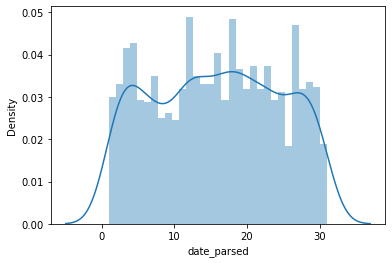

In [338]:
import seaborn as sns
sns.distplot(day_of_month_landslides, bins=31)